# Pre-processing and Feature extraction 

### Example: Amazon Review data set.

Obtain the data set from this link below. 

https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz

Extract/unzip the .gz file onto the same directory as where you store this iPython file.

Finally, add the extension name .csv to the extracted file (approx 600 MB). The read_csv mode in Pandas works however, also with .tsv file extension.


### Step 1: Load the data set and select useful data parts

In [27]:
#Import required packages
import pandas as pd
import numpy as np
import nltk
import re

In [28]:
# disable the SettingWithCopyWarning feature (False positive) because it prevents you from making changes to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'

Read more about this Warning issue with Pandas here:

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [29]:
#read the data
df=pd.read_csv('amazon_reviews_us.csv', sep='\t', header=0, error_bad_lines=False)

#NOTE: either the.csv file or .tsv file is fine 
#e.g. df=pd.read_csv('amazon_reviews_us.tsv', sep='\t', header=0, error_bad_lines=False) also works.


b'Skipping line 10437: expected 15 fields, saw 22\nSkipping line 10443: expected 15 fields, saw 22\nSkipping line 19872: expected 15 fields, saw 22\nSkipping line 20055: expected 15 fields, saw 22\nSkipping line 20107: expected 15 fields, saw 22\nSkipping line 20167: expected 15 fields, saw 22\nSkipping line 53858: expected 15 fields, saw 22\n'
b'Skipping line 72173: expected 15 fields, saw 22\nSkipping line 84308: expected 15 fields, saw 22\nSkipping line 92156: expected 15 fields, saw 22\nSkipping line 97791: expected 15 fields, saw 22\nSkipping line 106812: expected 15 fields, saw 22\n'
b'Skipping line 138899: expected 15 fields, saw 22\nSkipping line 145840: expected 15 fields, saw 22\nSkipping line 192385: expected 15 fields, saw 22\nSkipping line 194126: expected 15 fields, saw 22\n'
b'Skipping line 222872: expected 15 fields, saw 22\nSkipping line 236587: expected 15 fields, saw 22\nSkipping line 245017: expected 15 fields, saw 22\n'
b'Skipping line 273895: expected 15 fields, s

In [30]:
df.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,50423057,R135Q3VZ4DQN5N,B00JWXFDMG,657335467,Everbling Purple and Clear Briolette Drop Swar...,Jewelry,5,0.0,0.0,N,Y,Beauties!,so beautiful even tho clearly not high end ......,2015-08-31
1,US,11262325,R2N0QQ6R4T7YRY,B00W5T1H9W,26030170,925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,5,0.0,0.0,N,N,Great product.,"Great product.. I got this set for my mother, ...",2015-08-31
2,US,27541121,R3N5JE5Y4T6W5M,B00M2L6KFY,697845240,"Sterling Silver Circle ""Friends Forever"" Infin...",Jewelry,5,0.0,0.0,N,Y,Exactly as pictured and my daughter's friend l...,Exactly as pictured and my daughter's friend l...,2015-08-31


We require only the **review_body, star_rating** columns which describes the reviews, star rating of each review respectively.


In [31]:
df=df[['review_body','star_rating']]


In [32]:
# Remove nulls, missing values and reset the index
df=df.dropna()
df = df.reset_index(drop=True)
df

,review_body,star_rating
0,so beautiful even tho clearly not high end ......,5
1,"Great product.. I got this set for my mother, ...",5
2,Exactly as pictured and my daughter's friend l...,5
3,Love it. Fits great. Super comfortable and nea...,5
4,Got this as a Mother's Day gift for my Mom and...,5
5,I Love It Make Me Won't To Get Another,5
6,"True to size, unique",5
7,This necklace is BEAUTIFUL......is a great acc...,5
8,just perfect,5
9,Love it !,5


Now we have 17,66,748 reviews. 

The reviews with star rating 4,5 are labelled as positive reviews and 1,2 are labelled as negative reviews. 

Remove the reviews with star rating 3 as they are considered as neutral.

In [33]:
#convert the star_rating column to int data type
df['star_rating']=df['star_rating'].astype(int)

In [34]:
#Remove the review with star rating 3 (i.e. keep all that is different than 3)
df=df[df['star_rating']!=3]


In [35]:
#IF condition with numpy.where() numpy.where(condition[, x, y])
#return elements chosen from x or y depending on condition.
# In this case, if star-rating >=4 is satisfied, return the label as 1-Positve, if not then return 0-Negative.
df['label']=np.where(df['star_rating']>=4,1,0)

In [36]:
# Check the number of review groups by star ratings
df['star_rating'].value_counts()

5    1080871
4     270424
1     155002
2     100797
Name: star_rating, dtype: int64

In [37]:
#Select a random sample of 100 000 reviews from this universe of 1 607 094 reviews.
#50 000 should be positive, and the other half negative
#Shuffling step
df = df.sample(frac=1).reset_index(drop=True) 

In [38]:
data=df[df['label']==0][:50000]
data=data.append(df[df['label']==1][:50000])
data = data.reset_index(drop=True)
display(data['label'].value_counts())
data

1    50000
0    50000
Name: label, dtype: int64

,review_body,star_rating,label
0,Yeah.....see how easy you can read the message...,1,0
1,Do not purchase... Very misleading. Needles w...,1,0
2,What i received in the mail looked nothing lik...,1,0
3,i bought this a couple of months ago for my da...,1,0
4,Design is too small and unless you are right o...,2,0
5,"In the photo the ring is all gold. However, wh...",2,0
6,Great price. Very unexpected product. Cute but...,2,0
7,Was a little disappointed in this item. It wa...,2,0
8,i use this the other day to go to the club and...,1,0
9,The toe ring is way too big for any of my toes...,2,0


### Step 2: Pre-processing


In [39]:
# Convert the all reviews into the lower case using lambda function
data['pre_process'] = data['review_body'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [40]:
print(data['pre_process']) #check if lower casing is done correctly

0        yeah.....see how easy you can read the message...
1        do not purchase... very misleading. needles we...
2        what i received in the mail looked nothing lik...
3        i bought this a couple of months ago for my da...
4        design is too small and unless you are right o...
5        in the photo the ring is all gold. however, wh...
6        great price. very unexpected product. cute but...
7        was a little disappointed in this item. it was...
8        i use this the other day to go to the club and...
9        the toe ring is way too big for any of my toes...
10       i bought this bellyring and other stuff from b...
11                   much too small...picture is deceiving
12       wasn't happy with the color, was lighter than ...
13       waited almost a month for this braclet....what...
14                                 broke the first week!!!
15       these earrings hurt my niec's ears because the...
16       did not like. very cheap looking in appearance.

In [42]:
#Remove HTML tags and URLs from reviews with BeautifulSoup
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings("ignore", category=UserWarning, module='bs4') 
data['pre_process']=data['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())

In [43]:
#...and RegEx
import re
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

In [45]:
# perform contractions on the reviews
#Example: it won’t be converted as it will not be

def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"wouldn't", "would not",s)
 s = re.sub(r"couldn't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", "not", s)
 s= re.sub(r"\'re", 'are', s)
 s = re.sub(r"\'s", 'is', s)
 s = re.sub(r"\'ll", "will", s)
 s = re.sub(r"\'t", 'not', s)
 s = re.sub(r"\'ve", "have", s)
 s = re.sub(r"\'m", "am", s)
 return s
data['pre_process']=data['pre_process'].apply(lambda x:contractions(x))

In [46]:
#Remove non-alpha character
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [48]:
#Remove the extra spaces between the words
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(' +',' ', x))

In [49]:
#Remove the stopwords with nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [50]:
#Perform lemmatization with nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [51]:
#Check the data: Compare before and after pre-processing
data

,review_body,star_rating,label,pre_process
0,Yeah.....see how easy you can read the message...,1,0,yeah see easy read message picture show well b...
1,Do not purchase... Very misleading. Needles w...,1,0,purchase misleading needle g barbell g
2,What i received in the mail looked nothing lik...,1,0,received mail looked nothing like picture pret...
3,i bought this a couple of months ago for my da...,1,0,bought couple month ago daughteris birthday da...
4,Design is too small and unless you are right o...,2,0,design small unless right top tell tungsten he...
5,"In the photo the ring is all gold. However, wh...",2,0,photo ring gold however arrived dark black pew...
6,Great price. Very unexpected product. Cute but...,2,0,great price unexpected product cute desired pi...
7,Was a little disappointed in this item. It wa...,2,0,little disappointed item billed extra large st...
8,i use this the other day to go to the club and...,1,0,use day go club change color smh
9,The toe ring is way too big for any of my toes...,2,0,toe ring way big toe tried big toe small disap...


### Step 3: Feature Extraction with tf-idf Vectorizer

tf-idf can be implemented using sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [52]:
#First, split the data set into training and testing sets (for next week, when we continue with classification)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (75000,) (75000,) Test:  ((25000,), (25000,))


In [53]:
# Using tf-idf vectorizer
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


In [ ]:
# tf-idf weights
# A word is scored as the product of: average frequency of w x IDF of w 
tfidf = TfidfVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=0.9,  # at most 90% of docs
                        max_features=1000, #rank words by tfidf metric and choose top 1000
                        stop_words='english',
                        use_idf=True,
                        ngram_range=(1,3)) #range of n-grams considered

### Step 4: n-grams

In [87]:
#Define function to parse text into n-grams (n = your own choice)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ").str if word not in set(stopwords.words('english'))]  
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

The above function inputs two parameters:

1) text and n-gram, which refer to the text data for which we want to generate a given number of n-grams.

2) the number of grams to be generated respectively. 

Word tokenization is done where the stop words are ignored and the remaining words are retained.

In [88]:
#Check with a simple example
generate_N_grams("The sun rises in the East and sets in the West. Has it always been that way?", 3)

['The sun rises',
 'sun rises East',
 'rises East sets',
 'East sets West.',
 'sets West. Has',
 'West. Has always',
 'Has always way?']

#### 4.1. Creating unigrams


Let’s follow the steps below to create unigrams for the pre-processed data column of our Amazon dataframe:

Create unigrams for each of the records belonging to each of the three categories of sentiments:

1) Store the word and its count in the corresponding dictionaries

2) Convert these dictionaries to corresponding data frames

3) Fetch the top 10 most frequently used words

4) Visualize the most frequently used words for 2 categories: positive and negative.



In [96]:
#Create list of uni-grams given the data['pre_process']
data['pre_process_1gram'] = data['pre_process'].str.split(',')

In [ ]:
data['pre_process_1gram'] = data['pre_process'].astype(str)

In [97]:
#Apply n-gram splitter onto the dataframe
data['pre_process_1gram'] = data['pre_process'].apply(lambda x:generate_N_grams(x, 1))

In [98]:
#Check the data
data['pre_process_1gram']

0        [yeah, see, easy, read, message, picture, show...
1            [purchase, misleading, needle, g, barbell, g]
2        [received, mail, looked, nothing, like, pictur...
3        [bought, couple, month, ago, daughteris, birth...
4        [design, small, unless, right, top, tell, tung...
5        [photo, ring, gold, however, arrived, dark, bl...
6        [great, price, unexpected, product, cute, desi...
7        [little, disappointed, item, billed, extra, la...
8                 [use, day, go, club, change, color, smh]
9        [toe, ring, way, big, toe, tried, big, toe, sm...
10       [bought, bellyring, stuff, bodyjyou, mean, cen...
11                       [much, small, picture, deceiving]
12               [wasnot, happy, color, lighter, expected]
13       [waited, almost, month, braclet, disappointmen...
14                                    [broke, first, week]
15       [earring, hurt, niecis, ear, mickey, flat, bac...
16           [like, cheap, looking, appearance, hard, pu

In [105]:
#Our cleaned dataset has only positive and negative labels, which corresponds to the star rating
good_reviews = data[data.star_rating>=4]['pre_process_1gram']
bad_reviews = data[data.star_rating<=2]['pre_process_1gram']

#### 4.2. Creating bi-grams

In [115]:
#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

When using CountVectorizer constructor, it has parameter lowercase, which is True by default. When you call .fit_transform() it tries to lower case your input that contains an integer. 

More specifically, in your input data, you have an item which is an integer object. When you pass a list to CountVectorizer it throws such exception. 

Therefore, to avoid such an issue, we need to include lowercase = False inside the CountVectorizer function.

In [120]:
# Function to obtain top occuring bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),lowercase=False, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [124]:
# Apply function above onto the reviews
common_words_good = get_top_n_bigram(good_reviews, 30)

In [125]:
common_words_bad = get_top_n_bigram(bad_reviews, 30)

In [128]:
#Print top 10 common words in good reviews
common_words_good[:10]


[('look great', 1473),
 ('look like', 1335),
 ('good quality', 1199),
 ('love ring', 955),
 ('great price', 843),
 ('highly recommend', 788),
 ('perfect size', 764),
 ('really like', 716),
 ('great quality', 699),
 ('sterling silver', 684)]

In [127]:
#Print top 10 common words in bad reviews
common_words_bad[:10]

[('look like', 3614),
 ('waste money', 1500),
 ('like picture', 1153),
 ('look cheap', 1095),
 ('sterling silver', 954),
 ('poor quality', 950),
 ('cheap looking', 927),
 ('stone fell', 795),
 ('looked like', 670),
 ('fell apart', 664)]

## Step 5: Visualization

#### Top common bi-grams 

In [136]:
#Import matplotlib package
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
# Create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

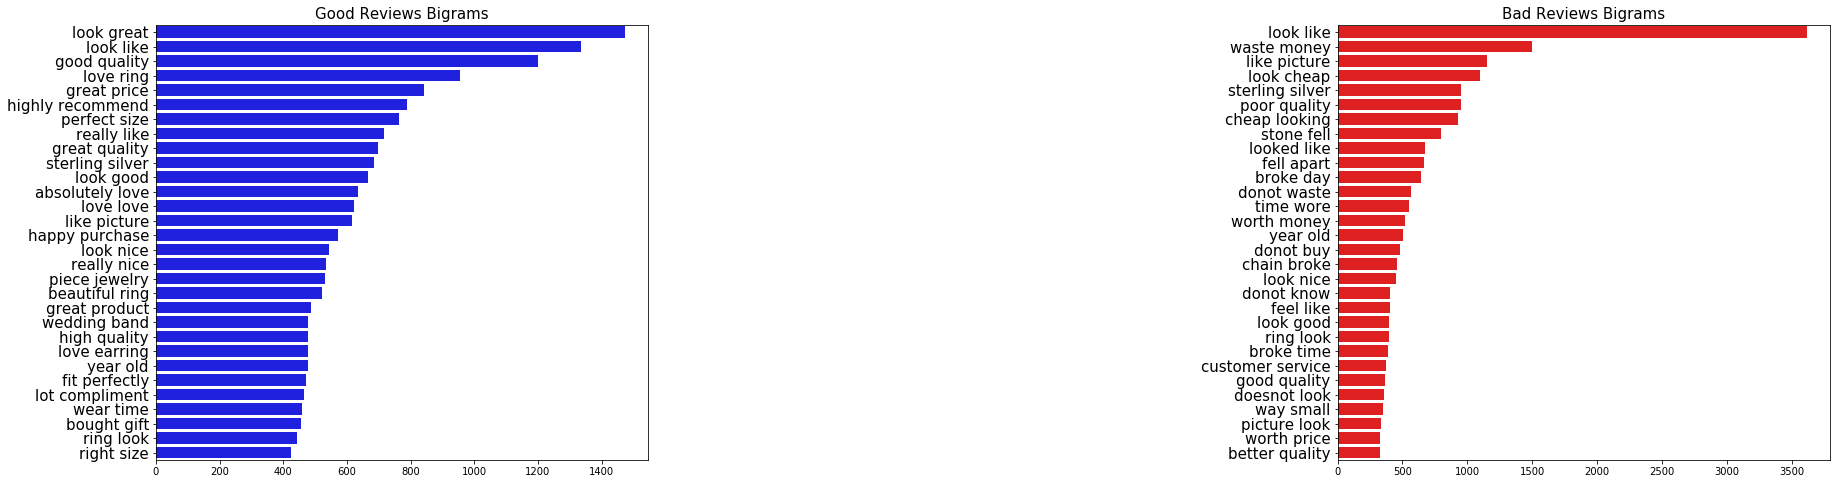

In [139]:
# bigram plot using function above
plt.figure(figsize=(30,8))
# good reviews bigrams
plt.subplot(1,3,1)
n_gram_plot(common_words_good,'Good','blue')
#bad reviews bigrams
plt.subplot(1,3,3)
n_gram_plot(common_words_bad,'Bad','r')
plt.show()

#### Word Clouds

Word cloud’ pictures beautifully and directly show us the customers’ main thoughts. It basically has the same idea of n-grams, but word clouds are more vivid.

In [143]:
# Import packages
from wordcloud import WordCloud

In [140]:
# Define a function to create a dictionary
def dictionary(data):
    dictionary={}
    for i in range(len(data)):
        dictionary[data[i][0]]=data[i][1]
    return dictionary

In [141]:
# obtain bigram data for each part
common_words_good = get_top_n_bigram(good_reviews, 30)
common_words_bad= get_top_n_bigram(bad_reviews, 30)

In [142]:
# Using the function above, convert a list of tuples into a dictionary type for each part 
good_re_dictionary=dictionary(common_words_good)
bad_re_dictionary=dictionary(common_words_bad)

In [144]:
# Define the word cloud function
def Word_Cloud(dictionary):
    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(dictionary)
    plt.figure(figsize=(8,10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
# Run the function 
Word_Cloud(good_re_dictionary)
Word_Cloud(bad_re_dictionary)